#**Importing the Required Libraries**

In [ ]:
import os
import glob
from IPython.display import Image, display

# **Check whether we have access to the GPU or not**

In [ ]:
!nvidia-smi

Wed Jan 10 17:24:37 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
HOME = os.getcwd()

In [ ]:
print(HOME)

/content


#**Installing Ultralytics using Pip Install**

In [ ]:
!git clone https://github.com/MuhammadMoin97/ultralytics.git

Cloning into 'ultralytics'...
remote: Enumerating objects: 3878, done.
remote: Total 3878 (delta 0), reused 0 (delta 0), pack-reused 3878
Receiving objects: 100% (3878/3878), 1.82 MiB | 14.13 MiB/s, done.
Resolving deltas: 100% (2691/2691), done.


#**Setting the Current Directory**

In [ ]:
%cd {HOME}/ultralytics

/content/ultralytics


#**Installing all the Dependencies**

In [ ]:
!pip install -e '.[dev]'

Obtaining file:///content/ultralytics
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

##Checking whether YOLOv8 is installed or not

In [ ]:
import ultralytics

In [ ]:
ultralytics.checks()

Ultralytics YOLOv8.0.3 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.4/78.2 GB disk)


#**Importing the Traffic Lights Dataset from Roboflow**

In [ ]:
HOME = '/content/ultralytics/ultralytics/yolo/v8/detect'

In [ ]:
%cd {HOME}
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="DMBANSOJiieXKAoIddmg")
project = rf.workspace("labelling-image").project("traffic-light-detection-o7veg")
dataset = project.version(1).download("yolov8")

/content/ultralytics/ultralytics/yolo/v8/detect
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall:

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.3, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Traffic-Light-Detection-1 in yolov8:: 100%|██████████| 3546/3546 [00:00<00:00, 5818.71it/s]


#**Train the YOLOv8 Model on the Custom Dataset**

In [ ]:
%cd {HOME}

/content/ultralytics/ultralytics/yolo/v8/detect


In [ ]:
%cd {dataset.location}

/content/ultralytics/ultralytics/yolo/v8/detect/Traffic-Light-Detection-1


In [ ]:
%cd {HOME}

!python train.py model=yolov8l.pt data={dataset.location}/data.yaml epochs=50 imgsz=640

/content/ultralytics/ultralytics/yolo/v8/detect
100% 83.7M/83.7M [00:00<00:00, 154MB/s]

yolo/engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/ultralytics/ultralytics/yolo/v8/detect/Traffic-Light-Detection-1/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, 

In [ ]:
!ls {HOME}/runs/detect/train2

ls: cannot access '/content/ultralytics/ultralytics/yolo/v8/detect/runs/detect/train2': No such file or directory


#**Displaying the Confusion Matrix**

/content/ultralytics/ultralytics/yolo/v8/detect


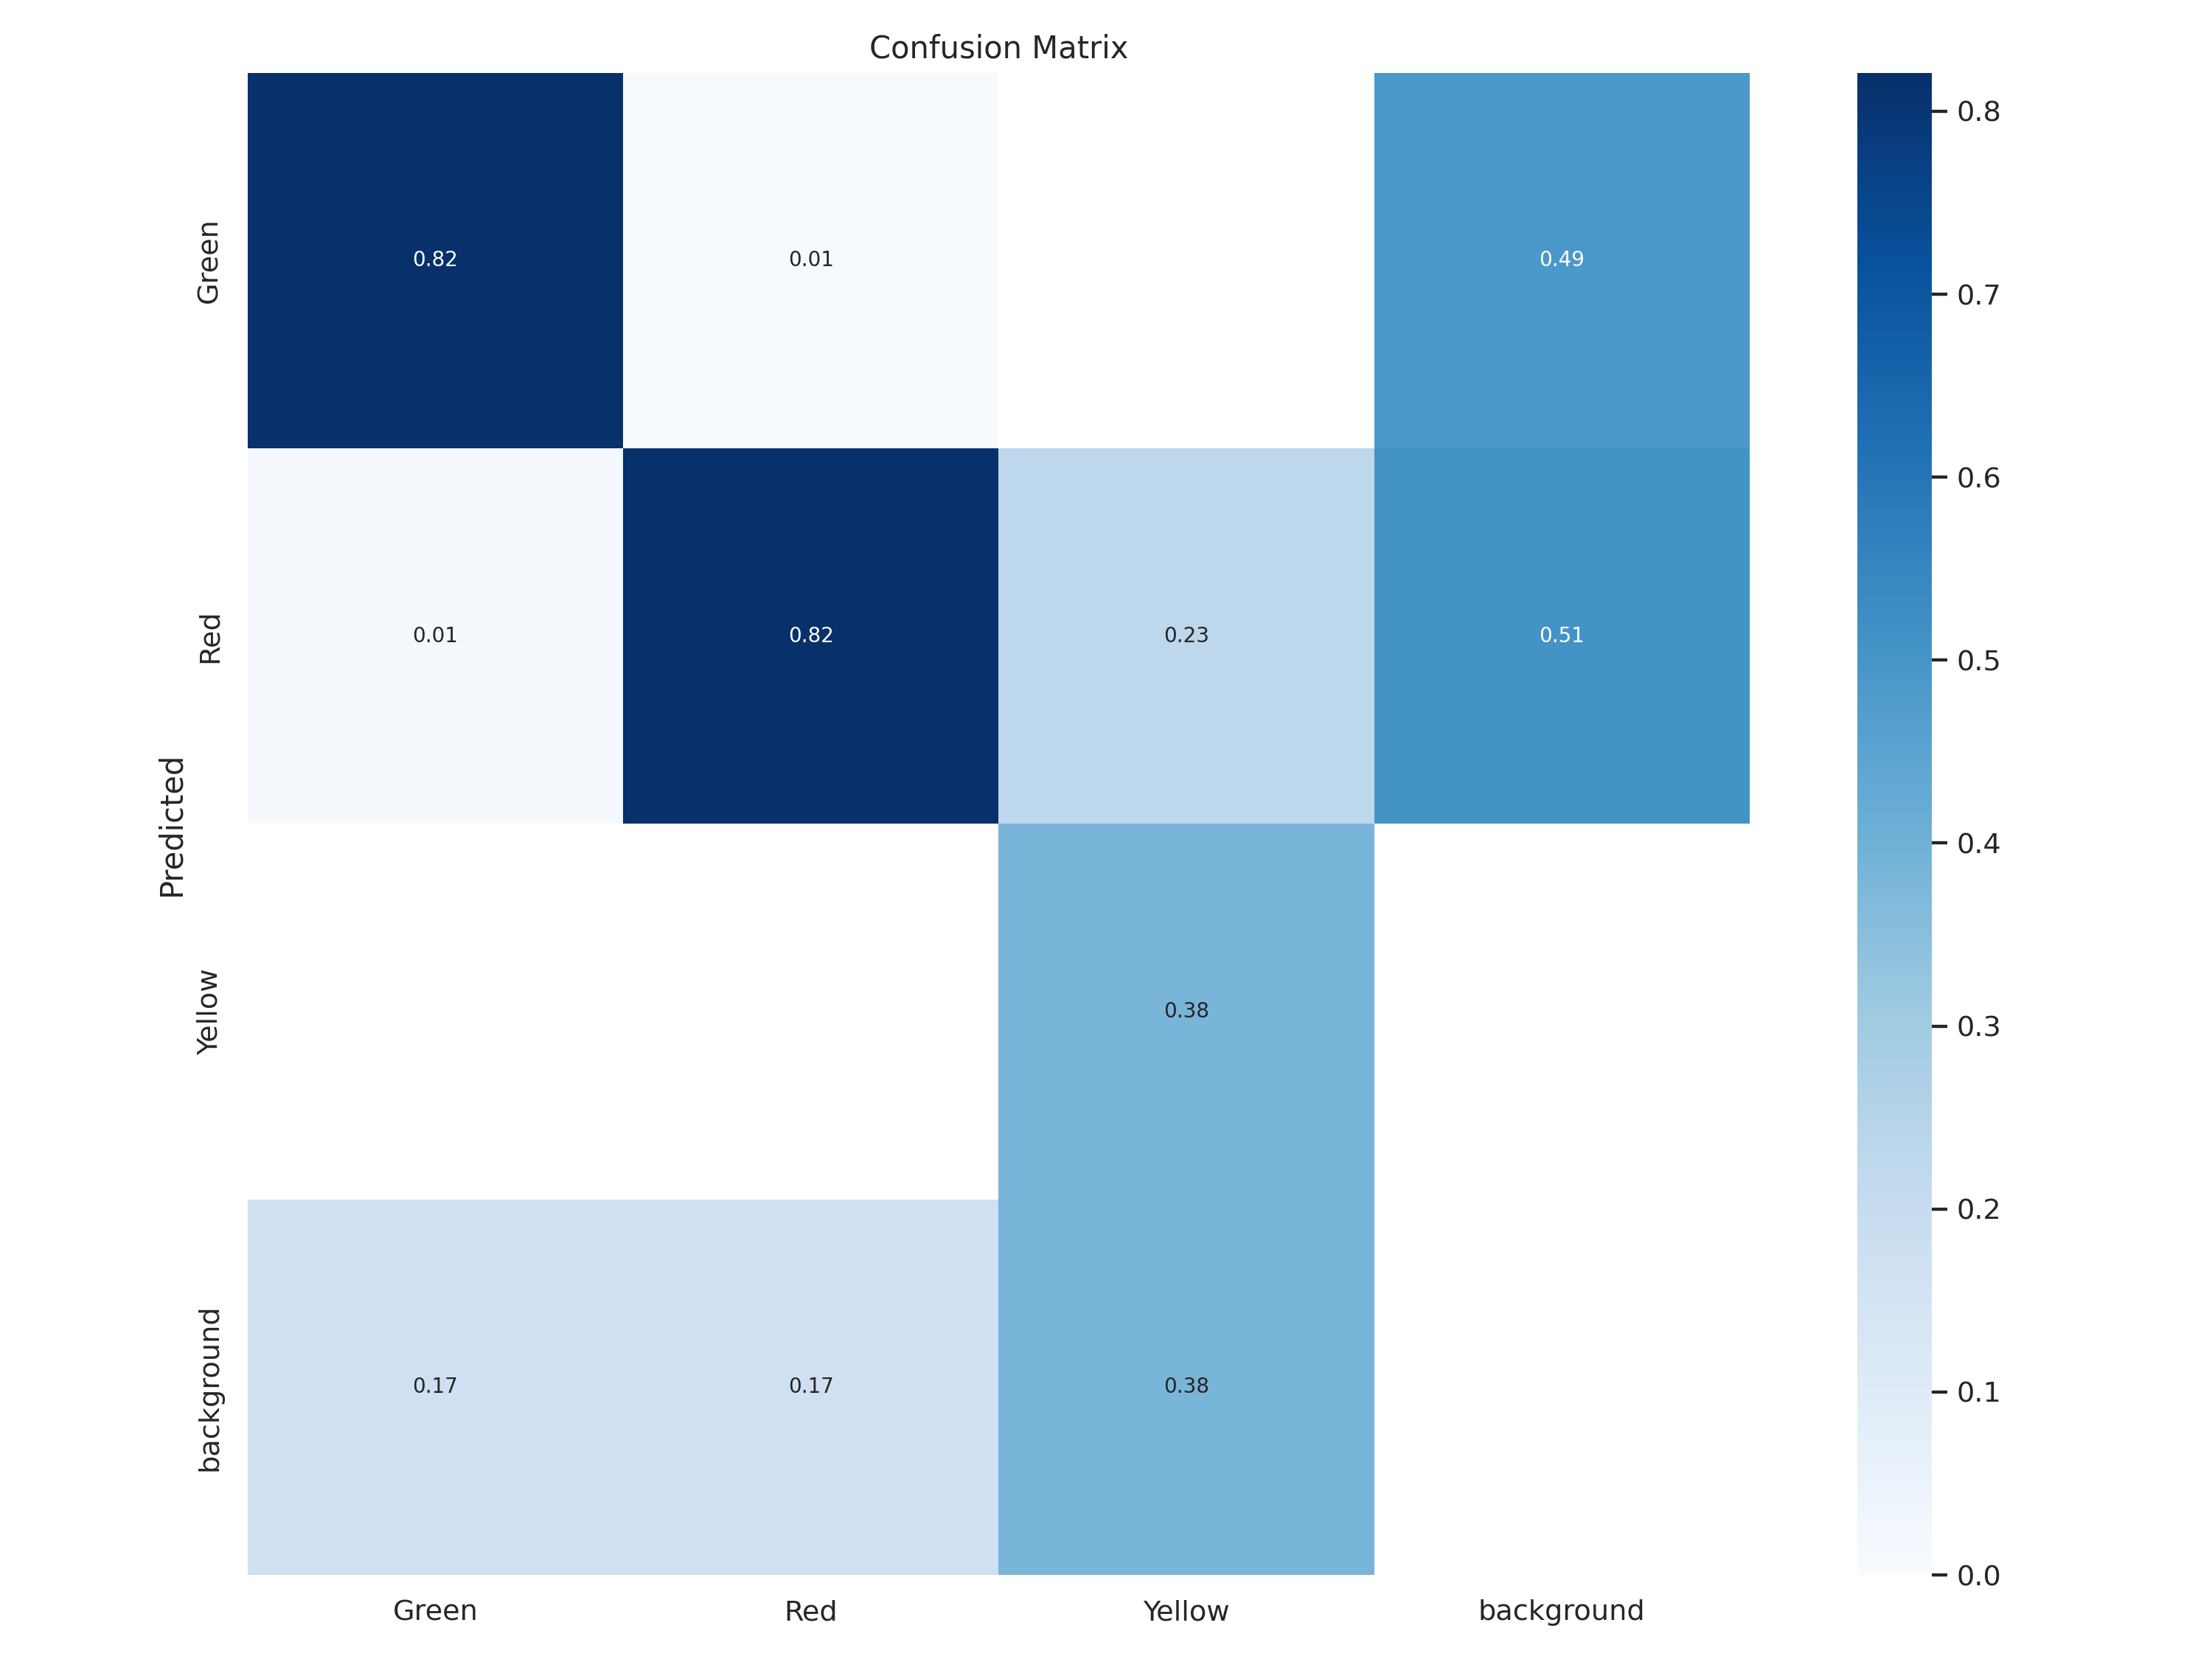

In [ ]:
%cd {HOME}
Image(filename=f'/content/ultralytics/ultralytics/yolo/v8/detect/runs/detect/train/confusion_matrix.png', width=900)

# **Displaying the F1 Curve**

/content/ultralytics/ultralytics/yolo/v8/detect


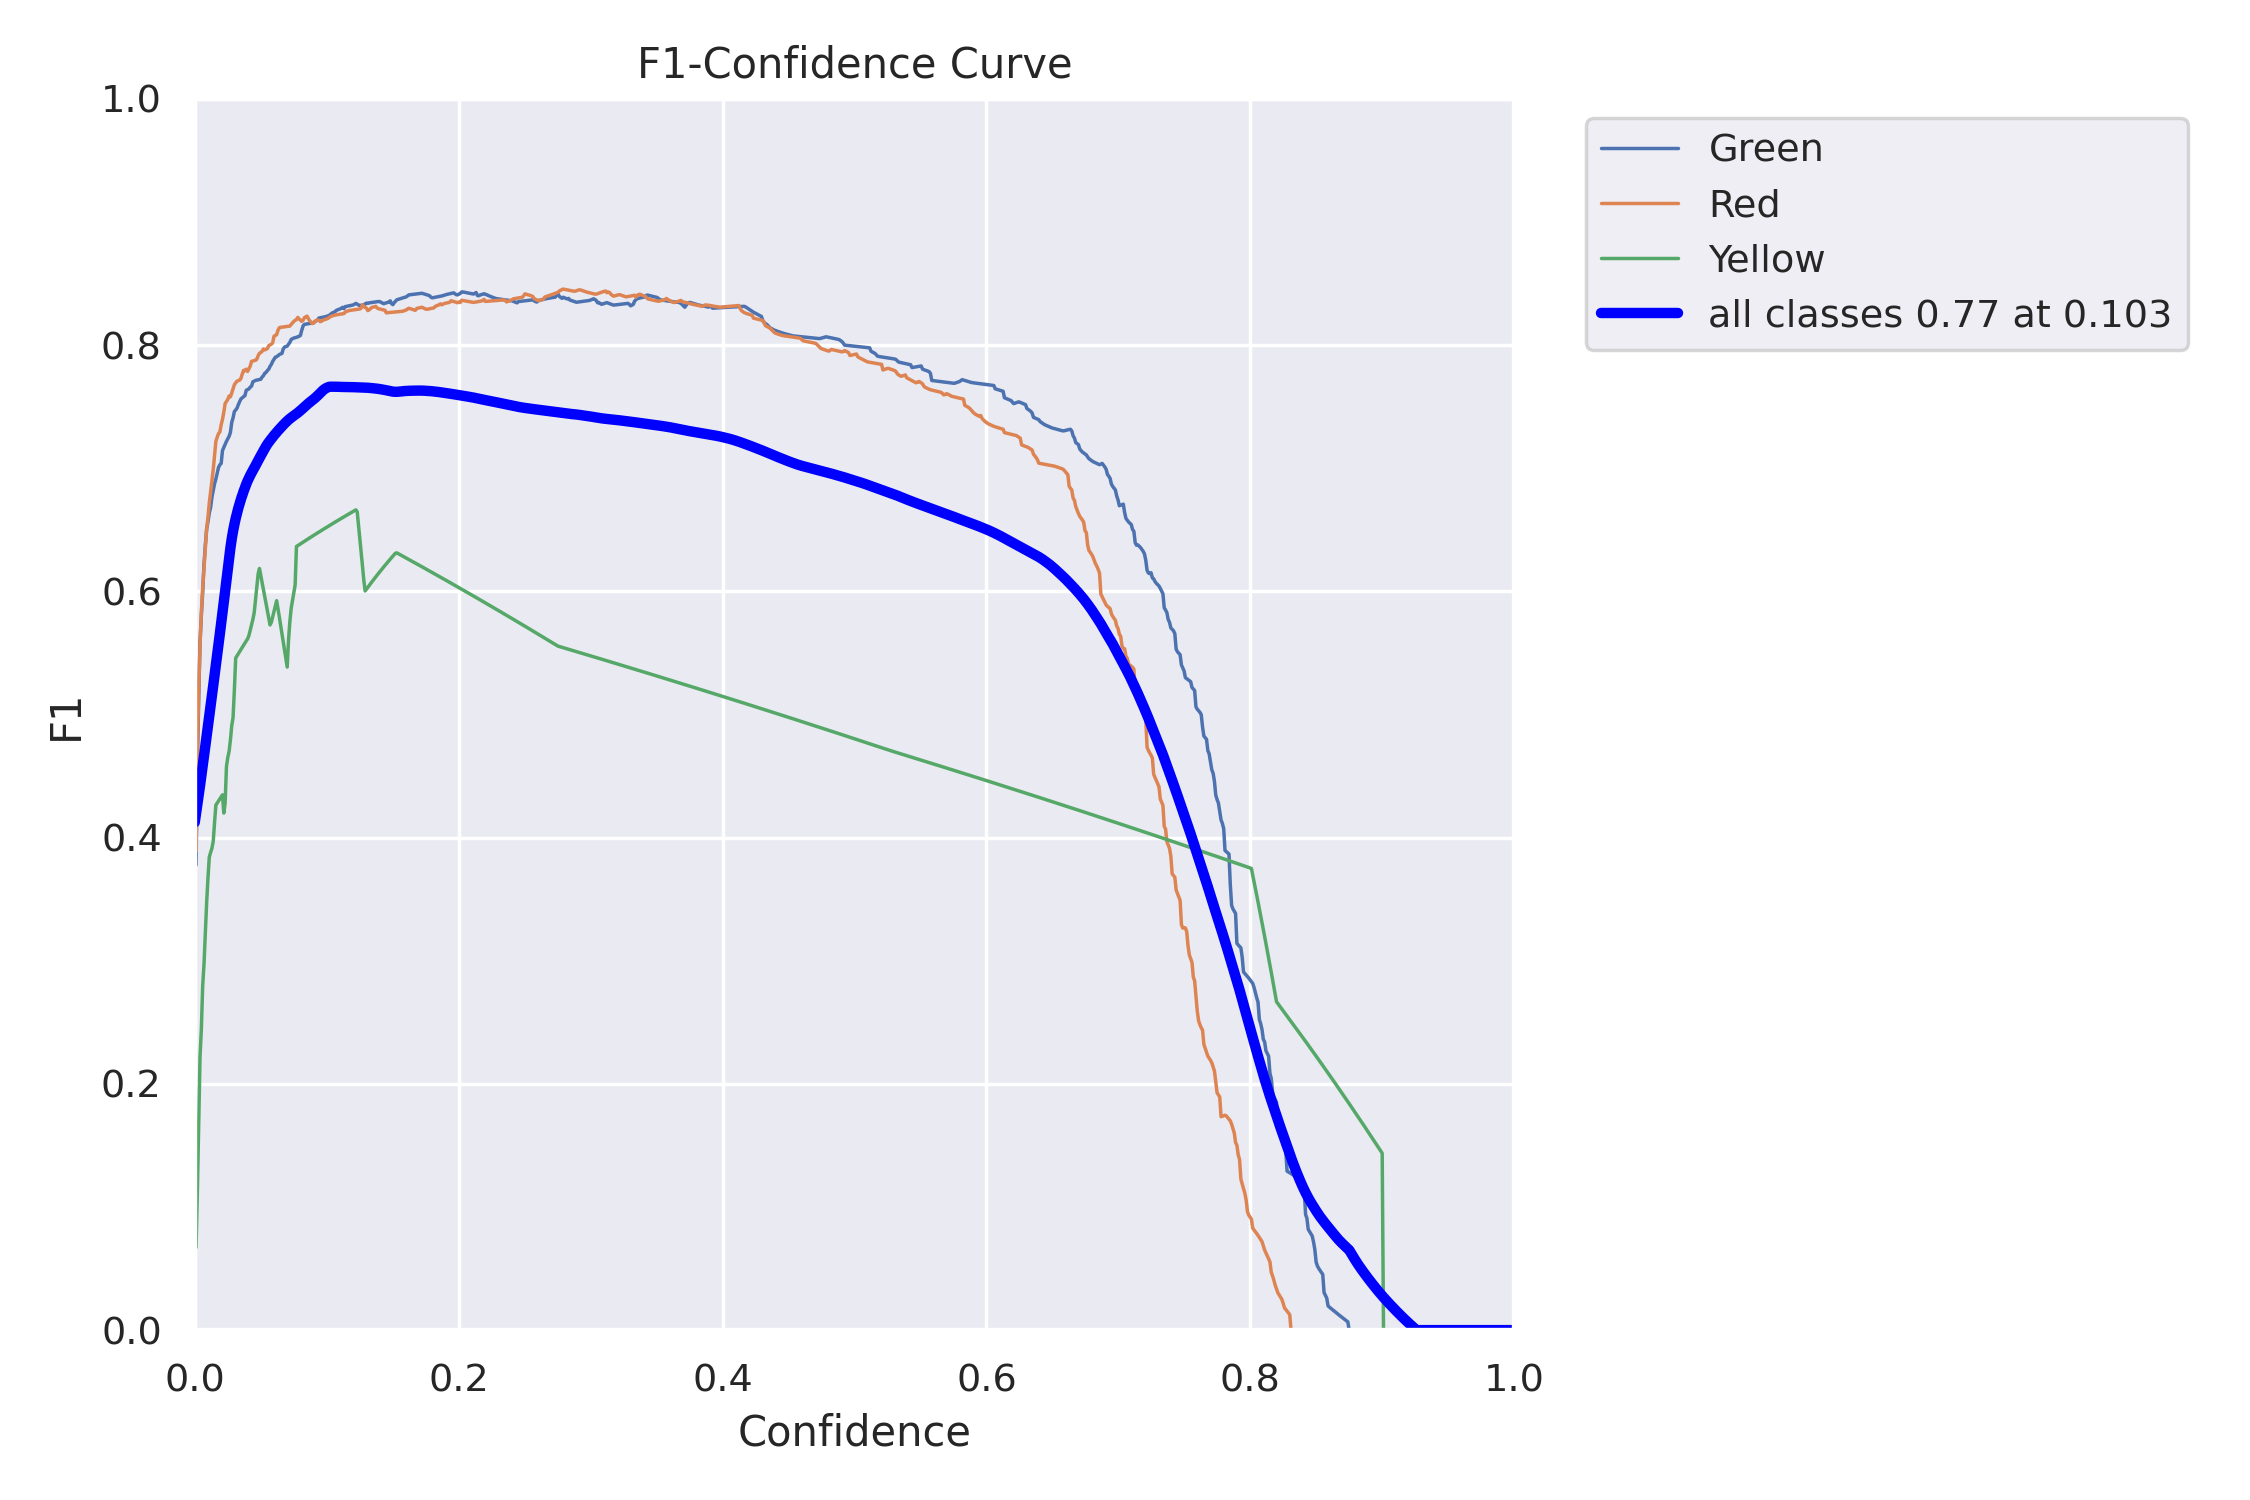

In [ ]:
%cd {HOME}
Image(filename=f'/content/ultralytics/ultralytics/yolo/v8/detect/runs/detect/train/F1_curve.png', width=900)

# **Displaying the PR Curve**

/content/ultralytics/ultralytics/yolo/v8/detect


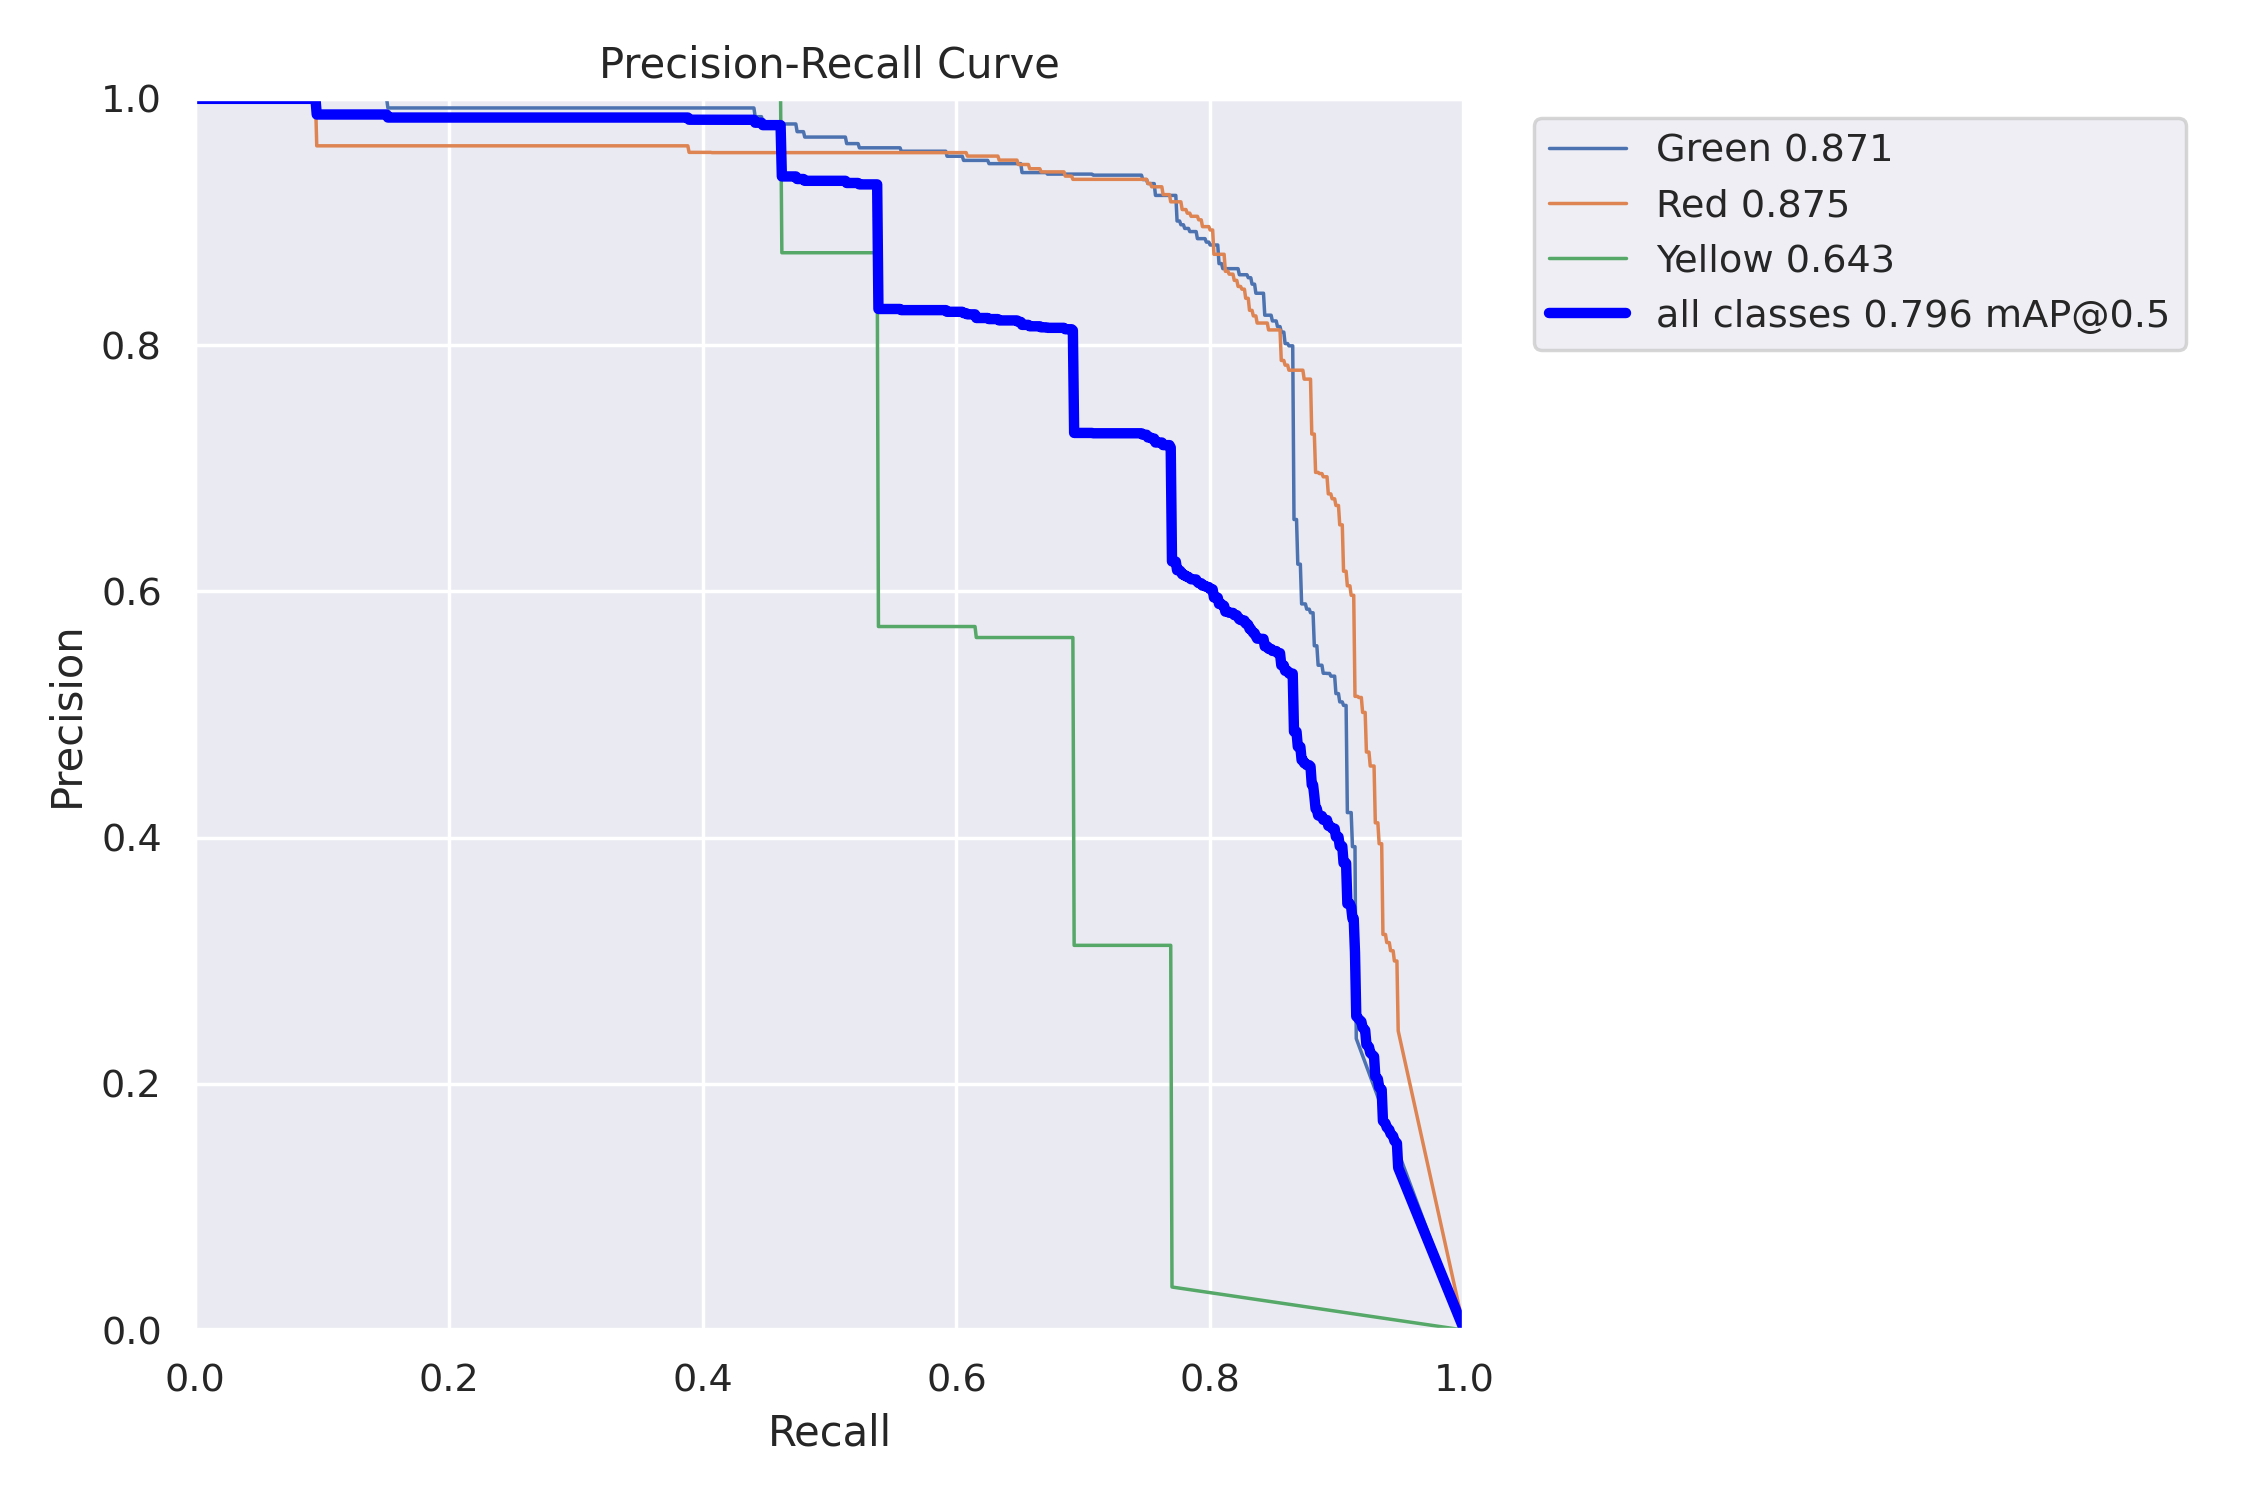

In [ ]:
%cd {HOME}
Image(filename=f'/content/ultralytics/ultralytics/yolo/v8/detect/runs/detect/train/PR_curve.png', width=900)

# **Displaying the P Curve**

/content/ultralytics/ultralytics/yolo/v8/detect


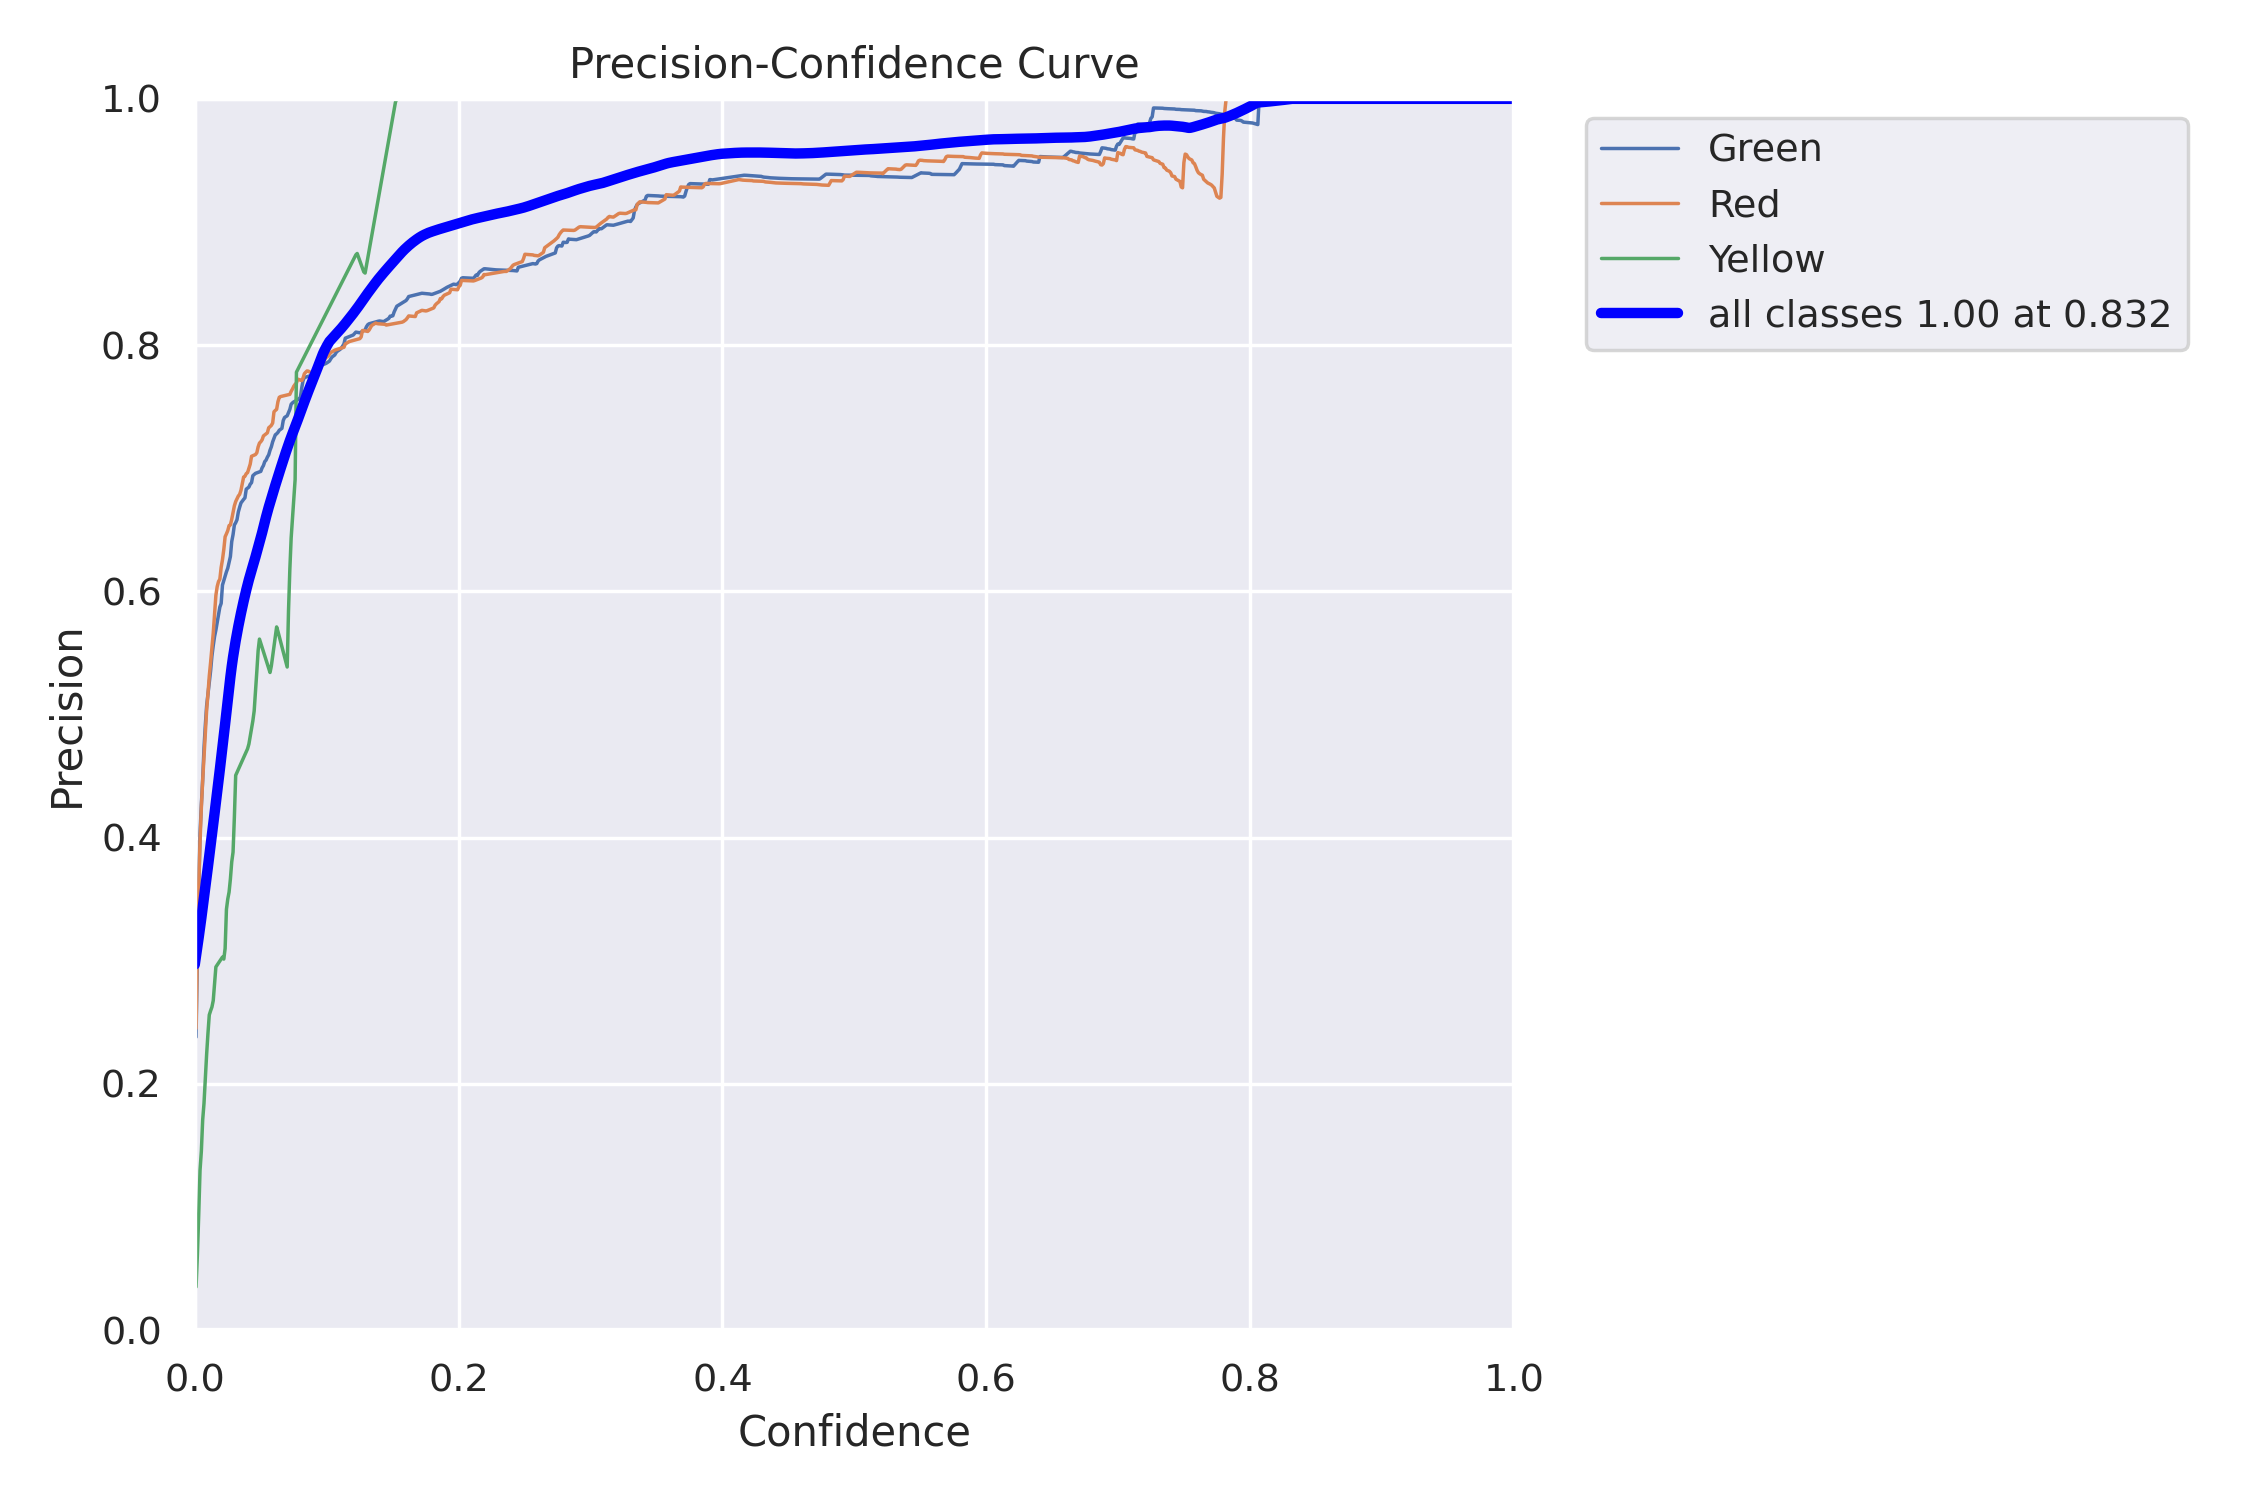

In [ ]:
%cd {HOME}
Image(filename=f'/content/ultralytics/ultralytics/yolo/v8/detect/runs/detect/train/P_curve.png', width=900)

# **Displaying the R Curve**

/content/ultralytics/ultralytics/yolo/v8/detect


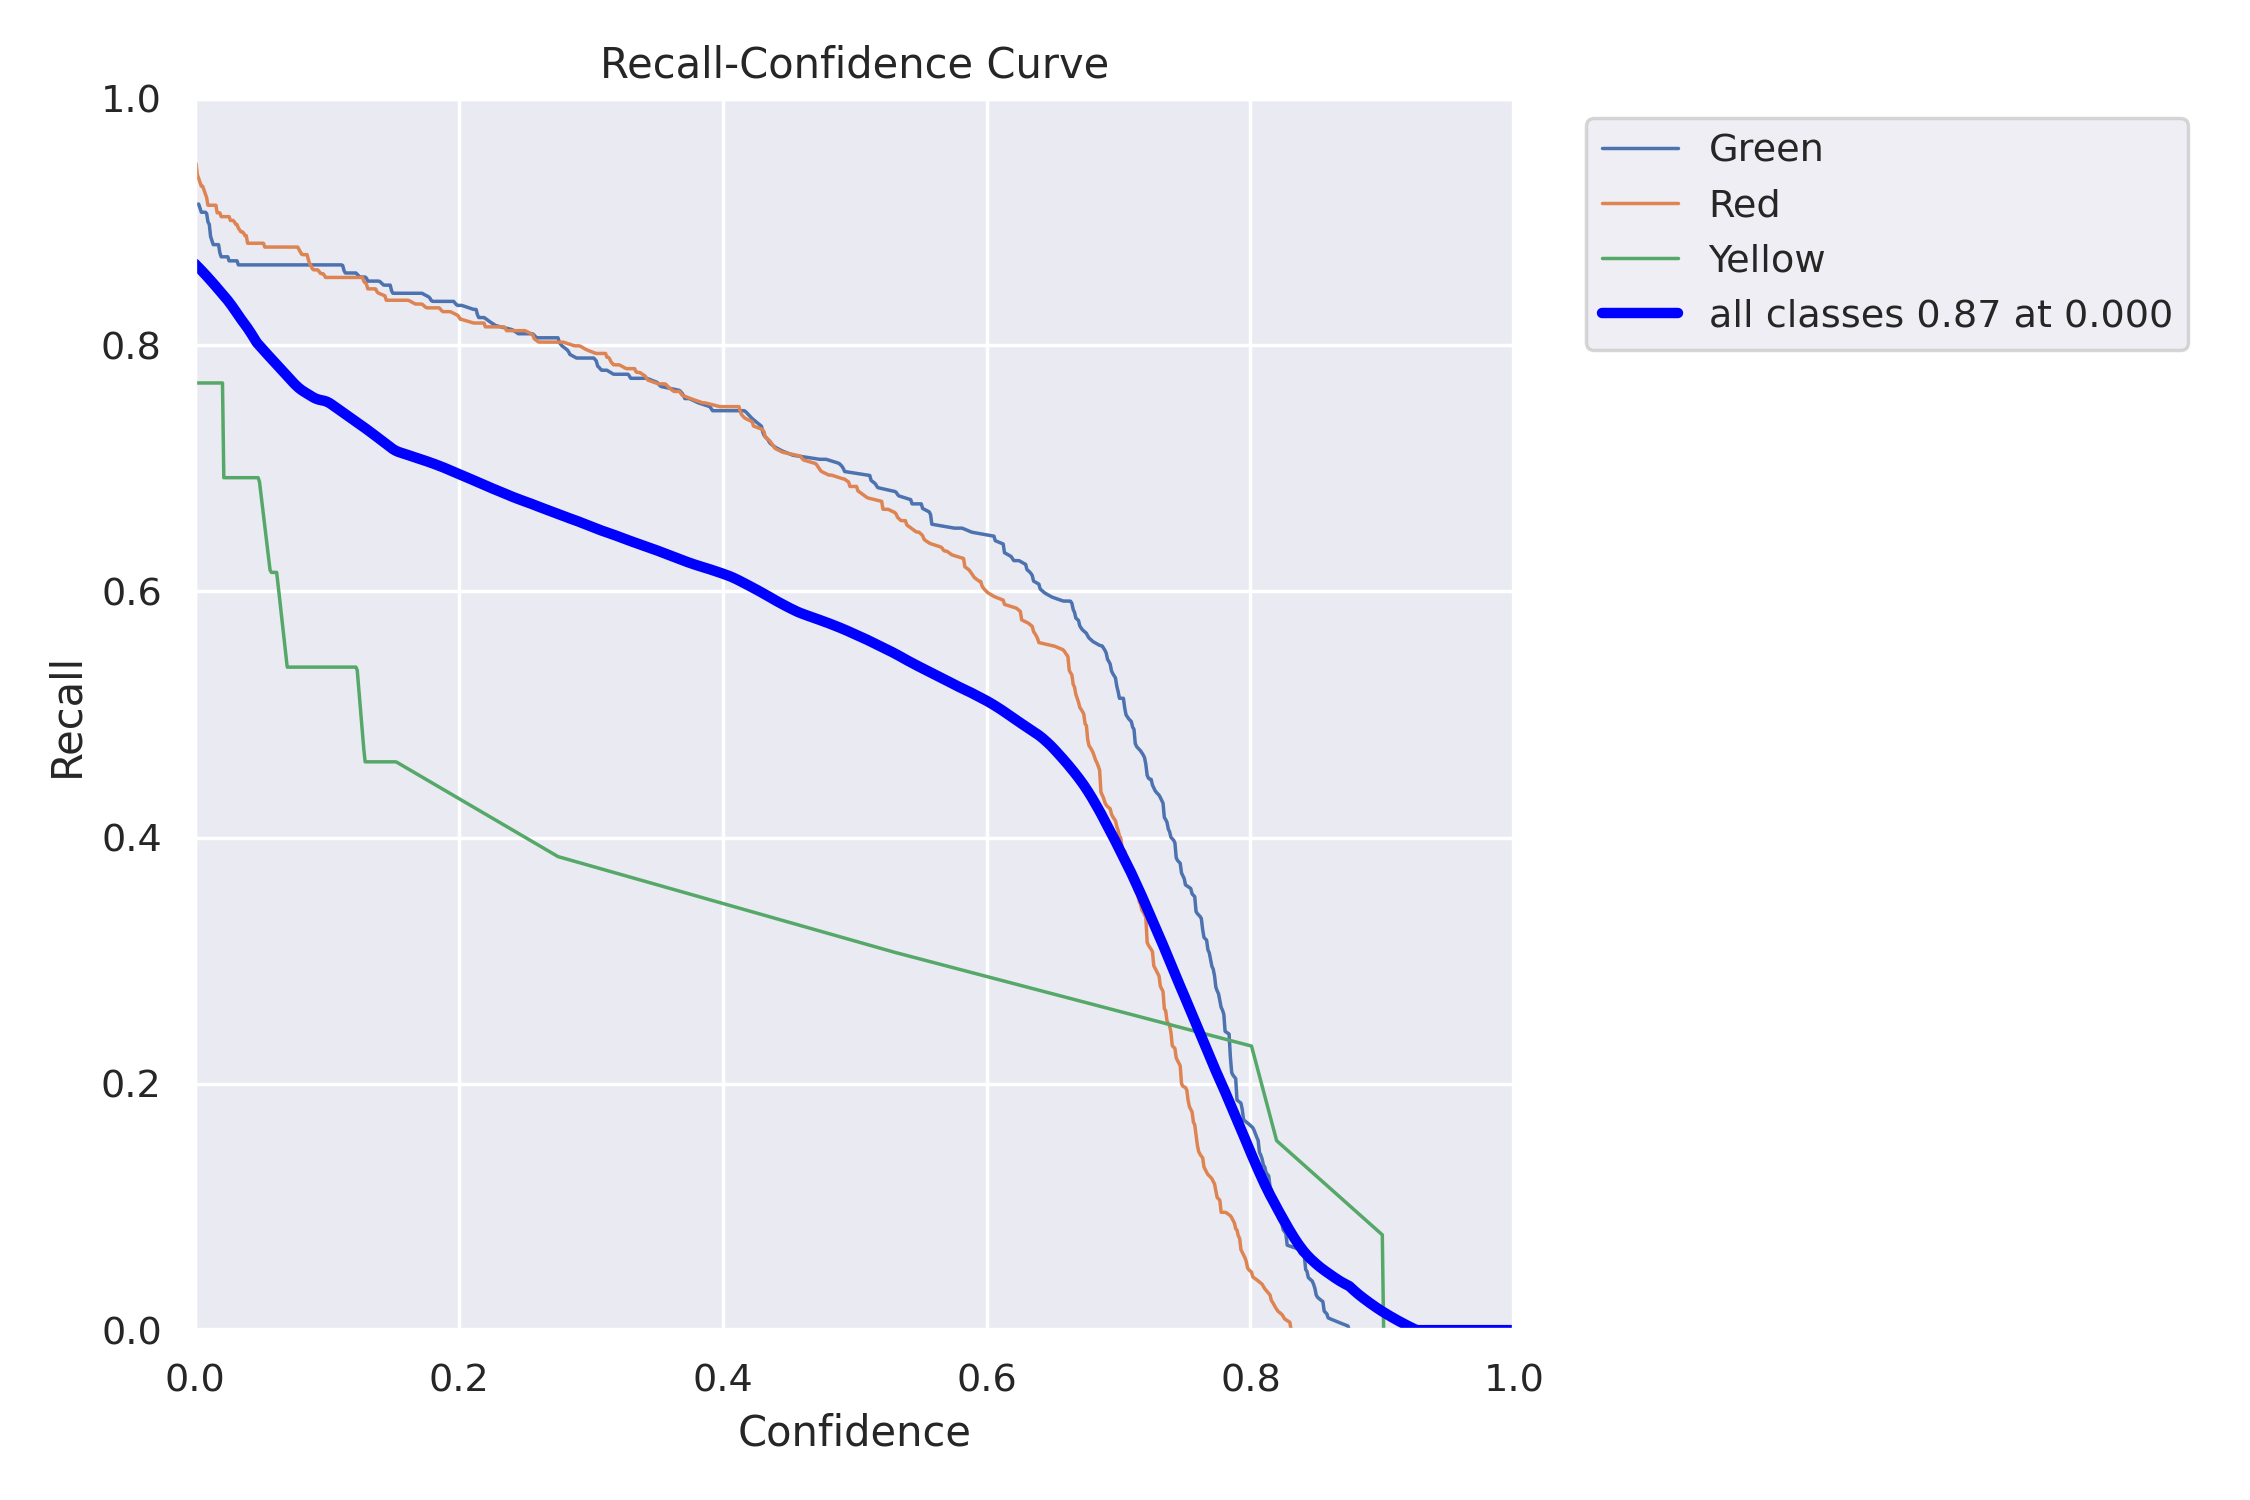

In [ ]:
%cd {HOME}
Image(filename=f'/content/ultralytics/ultralytics/yolo/v8/detect/runs/detect/train/R_curve.png', width=900)

#**Training and Validation Loss**

/content/ultralytics/ultralytics/yolo/v8/detect


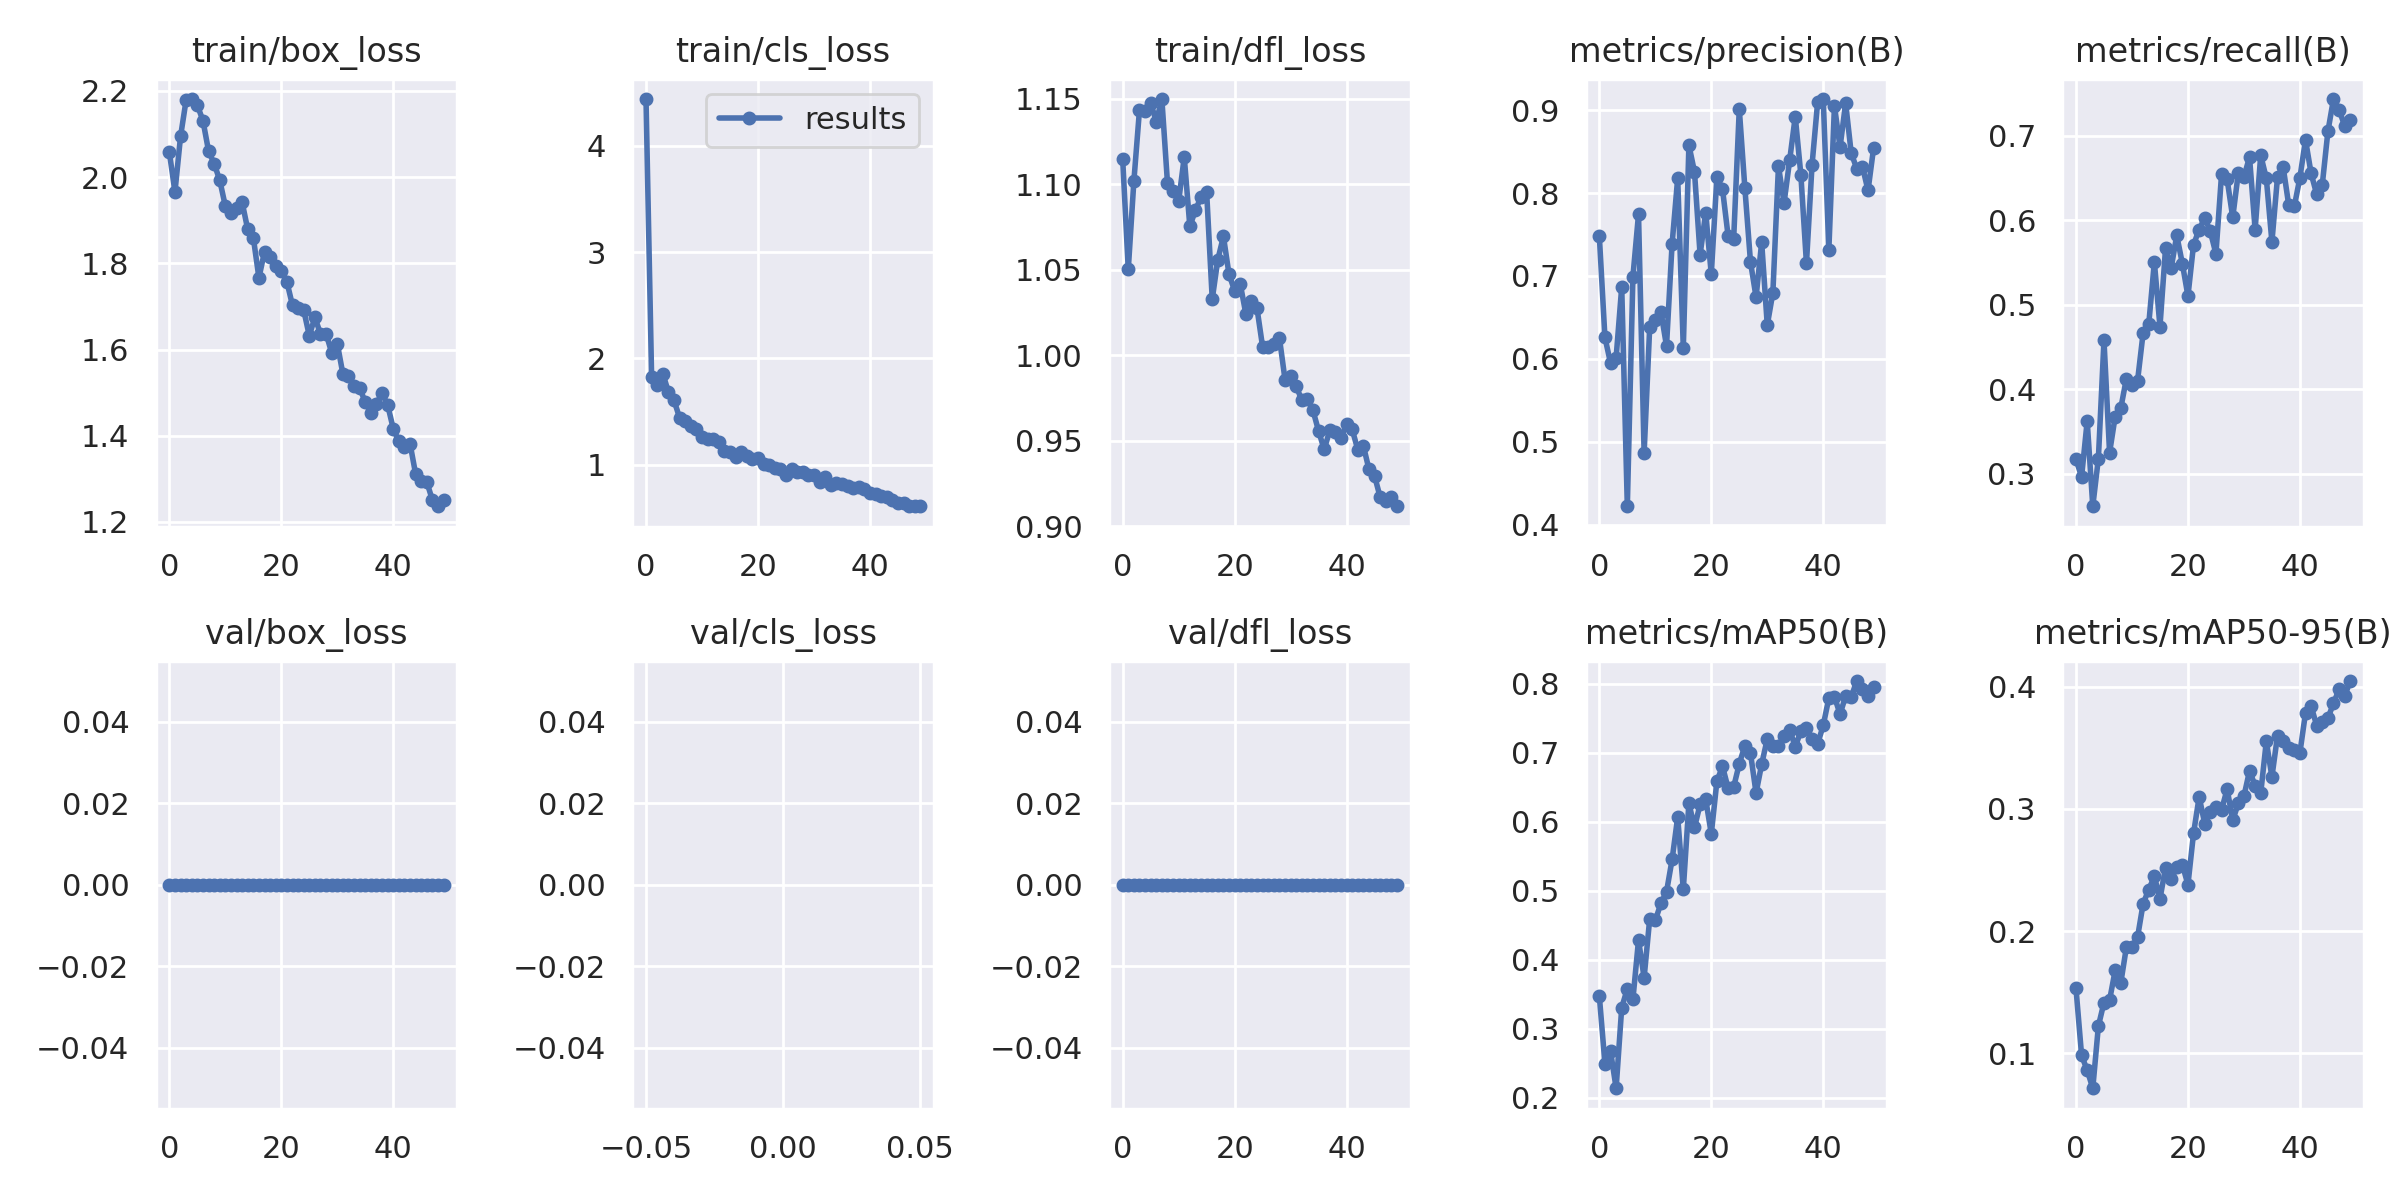

In [ ]:
%cd {HOME}

Image(filename=f'/content/ultralytics/ultralytics/yolo/v8/detect/runs/detect/train/results.png', width=600)

/content/ultralytics/ultralytics/yolo/v8/detect


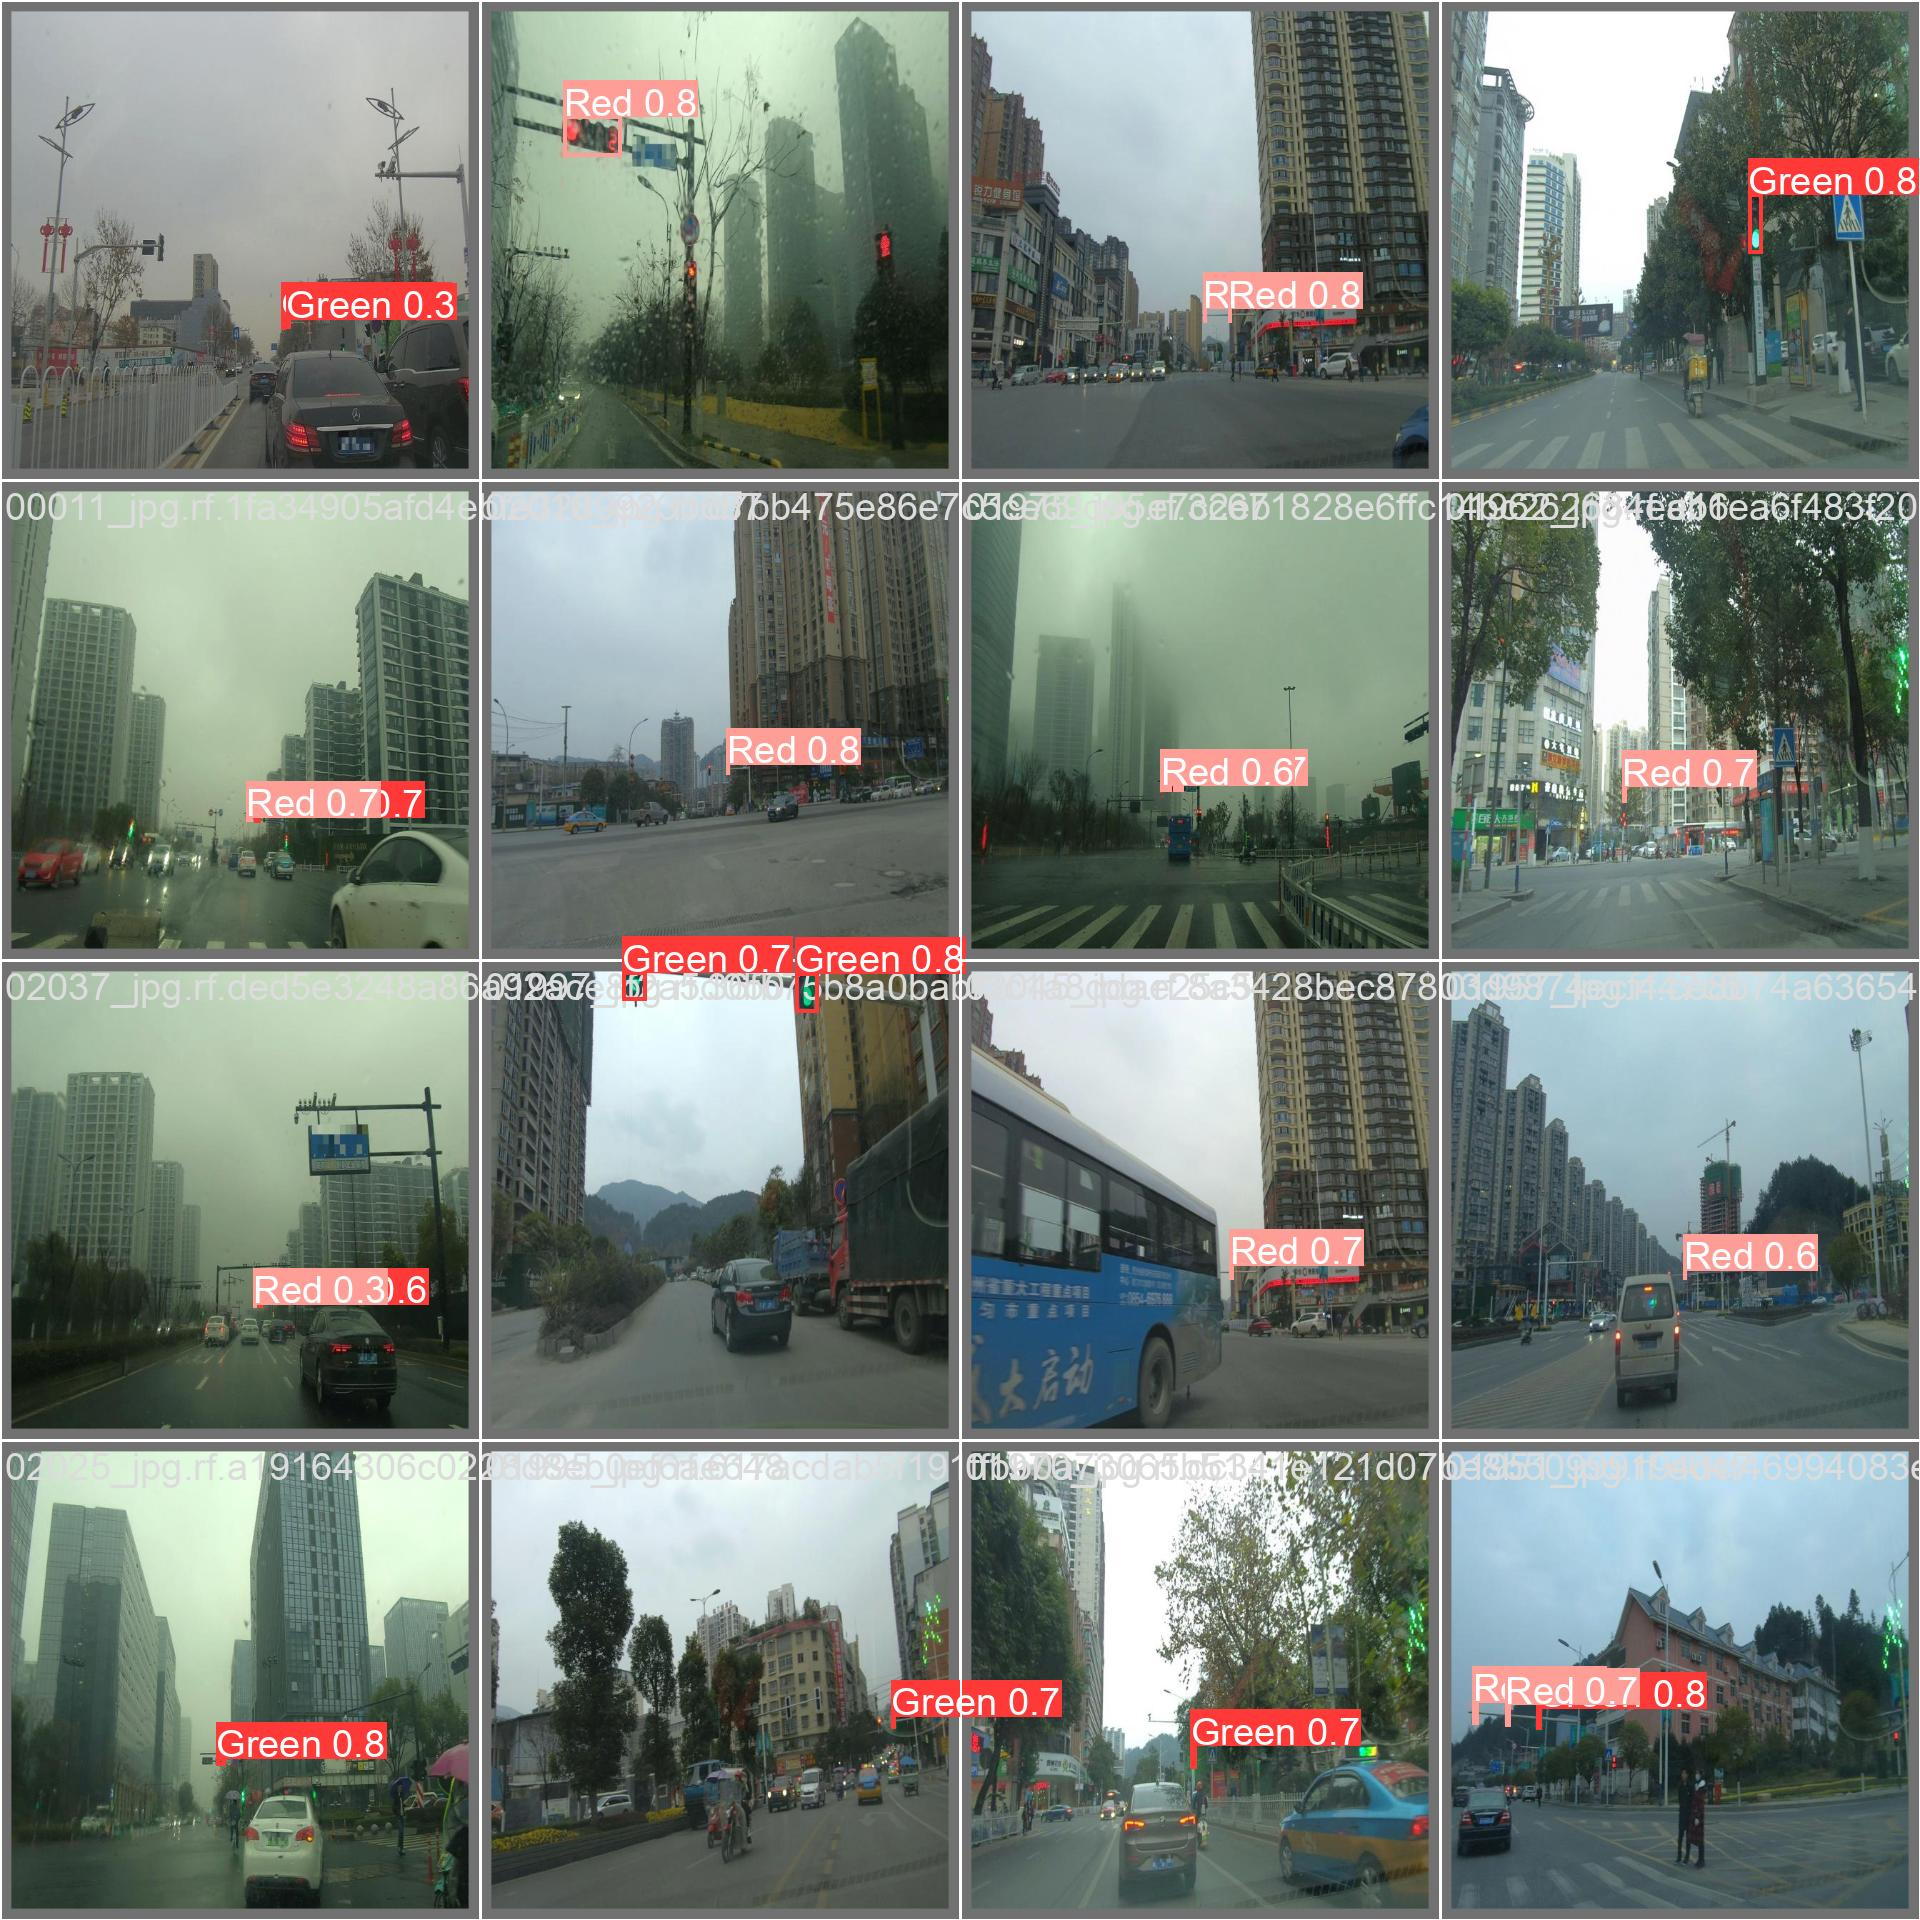

In [ ]:
%cd {HOME}
Image(filename=f'/content/ultralytics/ultralytics/yolo/v8/detect/runs/detect/train/val_batch0_pred.jpg', width=600)

#**Validate Custom Model**

In [ ]:
%cd {HOME}
!python val.py model='/content/ultralytics/ultralytics/yolo/v8/detect/runs/detect/train/weights/best.pt' data={dataset.location}/data.yaml

/content/ultralytics/ultralytics/yolo/v8/detect
2024-01-10 18:30:58.316654: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-10 18:30:58.316705: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-10 18:30:58.318122: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-10 18:30:59.355135: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.3 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 268 layers, 43608921 parameters, 0 gradients, 164.8 GFLOPs
val: Scanning /

#**Inference with Custom Model**

In [ ]:
# Testing the Model on Test Dataset images
%cd {HOME}

!python predict.py model='/content/ultralytics/ultralytics/yolo/v8/detect/runs/detect/train/weights/best.pt' source='/content/ultralytics/ultralytics/yolo/v8/detect/Traffic-Light-Detection-2/test/images'

/content/ultralytics/ultralytics/yolo/v8/detect
2024-01-10 18:31:33.209674: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-10 18:31:33.209723: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-10 18:31:33.211005: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-10 18:31:34.328512: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.3 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 268 layers, 43608921 parameters, 0 gradients, 164.8 GFLOPs
Error executing

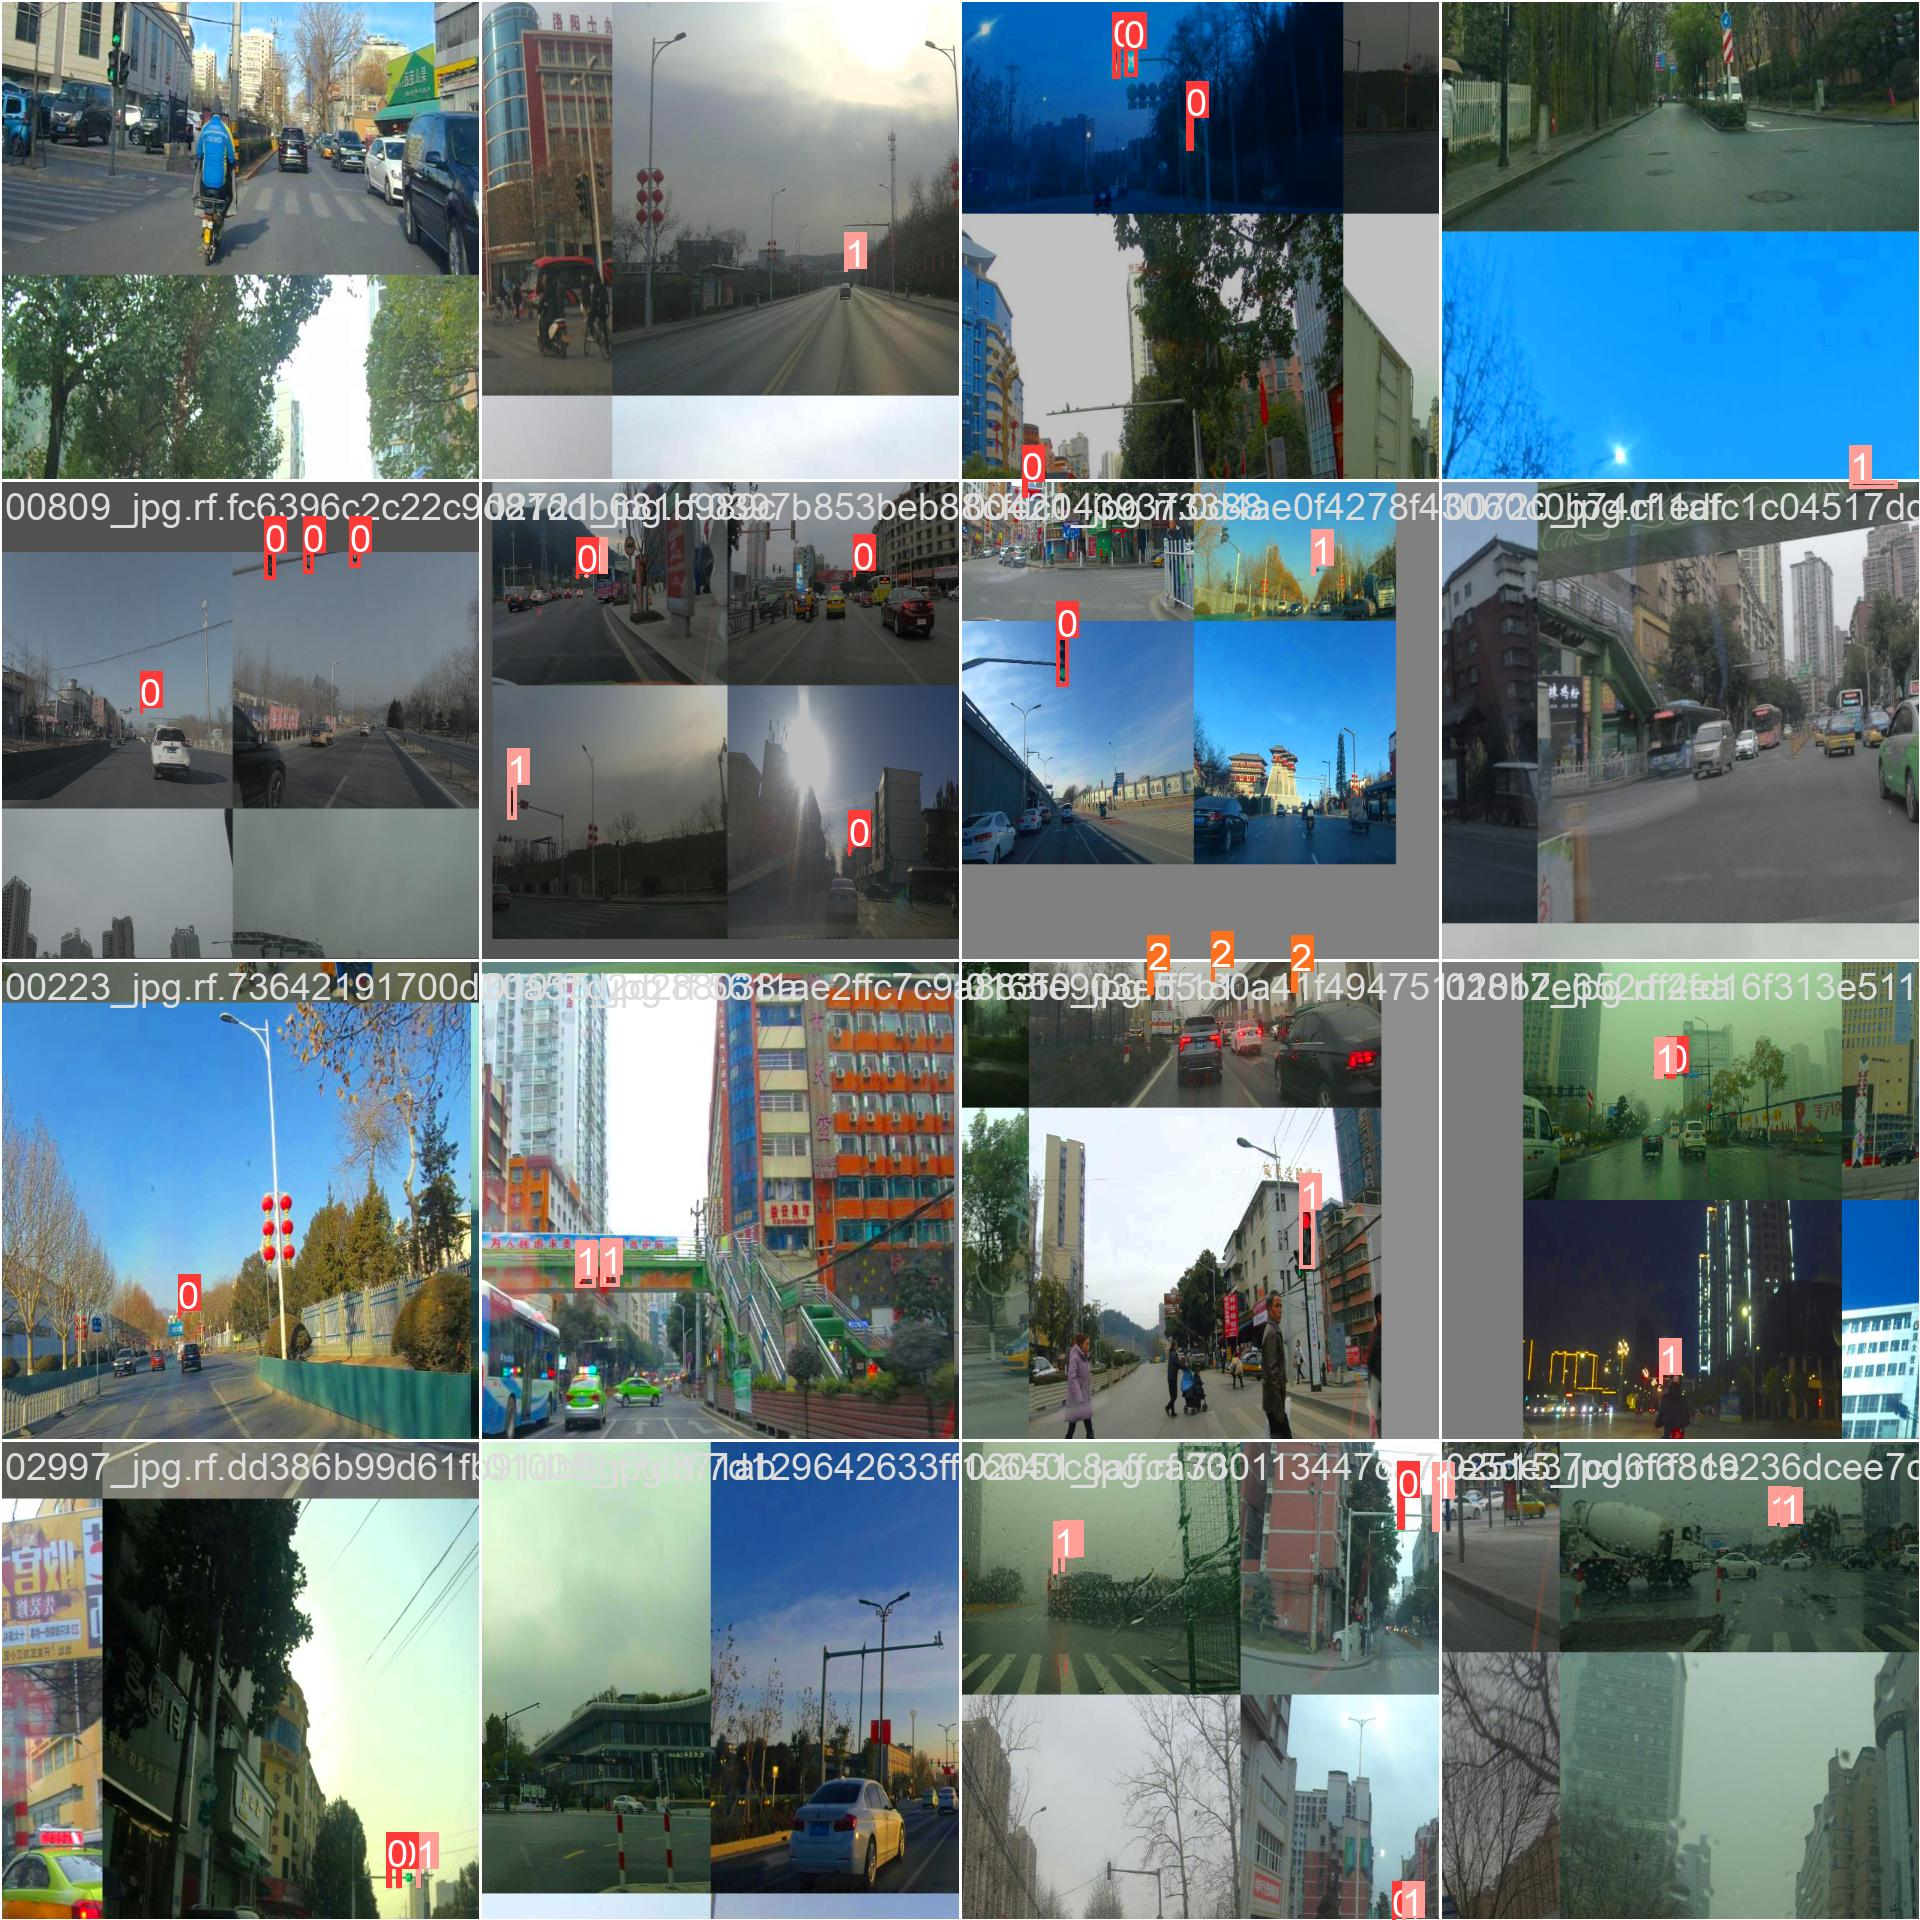

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/ultralytics/ultralytics/yolo/v8/detect/runs/detect/train/train_batch0.jpg')[:5]:
      display(Image(filename=image_path, width=600))
      print("\n")

#**Testing on a Demo Video**

In [ ]:
!gdown 'https://drive.google.com/uc?id=1LDDFyFLEnIEgLLe8TQj4Z-TO1LIQi-0p'

Downloading...
From: https://drive.google.com/uc?id=1LDDFyFLEnIEgLLe8TQj4Z-TO1LIQi-0p
To: /content/ultralytics/ultralytics/yolo/v8/detect/video_traffic.mp4
100% 2.02M/2.02M [00:00<00:00, 190MB/s]


In [ ]:
%cd {HOME}

!python predict.py model='/content/ultralytics/ultralytics/yolo/v8/detect/runs/detect/train/weights/best.pt' source='video_traffic.mp4' conf=0.45

/content/ultralytics/ultralytics/yolo/v8/detect
2024-01-10 19:04:54.828132: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-10 19:04:54.828188: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-10 19:04:54.829526: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-10 19:04:55.891354: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.3 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 268 layers, 43608921 parameters, 0 gradients, 164.8 GFLOPs
WARNING ⚠️ NMS 

#**Display the Demo Video**

In [ ]:
!rm '/content/result_compressed.mp4'

rm: cannot remove '/content/result_compressed.mp4': No such file or directory


In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/ultralytics/ultralytics/yolo/v8/detect/runs/detect/train5/video_traffic.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

#**Downloading the Demo Video2**

In [ ]:
!gdown 'https://drive.google.com/uc?id=10olCIoT_oi6mA8HfVDxm9IBVOKmQ7Bjc'

Downloading...
From: https://drive.google.com/uc?id=10olCIoT_oi6mA8HfVDxm9IBVOKmQ7Bjc
To: /content/ultralytics/ultralytics/yolo/v8/detect/video3.mp4
100% 47.6M/47.6M [00:00<00:00, 157MB/s]


#**Testing on the Demo Video**

In [ ]:
%cd {HOME}

!python predict.py model='/content/ultralytics/ultralytics/yolo/v8/detect/runs/detect/train/weights/best.pt' source='video3.mp4'

/content/ultralytics/ultralytics/yolo/v8/detect
2024-01-10 19:08:20.776594: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-10 19:08:20.776646: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-10 19:08:20.778640: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-10 19:08:22.073755: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.3 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 268 layers, 43608921 parameters, 0 gradients, 164.8 GFLOPs
video 1/1 (1/41

#**Display the Demo Video**

In [ ]:
!rm '/content/result_compressed.mp4'

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/ultralytics/ultralytics/yolo/v8/detect/runs/detect/train6/video3.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)